이전 예제에서는 다차원 넘파이 배열에 데이터를 저장하는 것을 배움. 최근의 머신 러닝 시스템은 일반적으로 텐서 **tensor**를 기본 데이터 구조로 사용함. 그렇다면 **tensor**란 무엇인가?

* **tensor**는 데이터를 위한 **container**
* 거의 항상 수치형 데이터를 다루므로 숫자를 위한 컨테이너

### 2.2.1 Scalar (0D Tensor)

하나의 숫자만 담고있는 텐서를 **scalar** 또는 **0D tensor**라고 부름

In [1]:
import numpy as np
x = np.array(12)
print(x)
print(x.ndim)

12
0


### 2.2.2 Vector (1D Tensor)

숫자의 배열을 **vector** 또는 **1D Tensor**라고 부름

In [2]:
x = np.array([12, 3, 6, 14, 17])
print(x)
print(x.ndim)

[12  3  6 14 17]
1


* 이 벡터는 5개의 원소를 가지고 있으므로 5차원 벡터라고 부름.
* 5차원 **벡터**와 5D **텐서**는 다름. ** 혼동 금지**
* 5D Vector: 1개의 축을 따라 5개의 차원을 가진 것
* 5D Tensor: 5개의 축을 가진 것

### 2.2.3 Matrix (2D Tensor)

벡터의 배열을 **행렬 (matrix)** 라고 부름.

* 행렬에는 2개의 축이 있음
* 보통 `row`와 `column` 이라고 부름

In [3]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

첫번째 축에 놓여있는 원소를 `행` (row)라고 부르고, 두번째 축에 놓여있는 원소를 `열` (column)이라 부름

* 앞의 예시에서는 x의 첫번째 행은 [5,78,2,34,0], 첫번째 열은 [5,6,7]

### 2.2.4 3D Tesnor와 고차원 Tensor

이런 행렬 (matrix)를 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석할 수 있는 3D 텐서가 만들어 짐

In [4]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 40, 36, 2]],
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x.ndim

3

### 2.2.5 핵심 속성

텐서는 3개의 핵심 속성으로 정의됨

* 축의 개수 (Rank): 3D Tensor에서는 3개의 축이 있고, Matrix에는 2개의 축이 있음
* 크기 (Shape): 텐서의 각 축을 따라서 얼마나 많은 차원이 있는지 나타낸 tuple.
    * 예를 들면 앞에 나온 행렬의 크기는 (3, 5), 3D Tensor의 크기는 (3, 3, 5)
* 데이터 타입 (Type): 텐서에 포함된 데이터의 타입

MNIST를 다시 보면:

In [5]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

ndim 으로 축의 개수를 확인:

In [6]:
print(train_images.ndim)

3


배열의 크기:

In [7]:
print(train_images.shape)

(60000, 28, 28)


배열의 데이터 타입:

In [8]:
print(train_images.dtype)

uint8


이 배열은 8비트 정수형 3D 텐서

* 명확하게는 28 x 28 크기의 정수 행렬 6만개가 있는 배열
* 각 행렬은 하나의 흑백 이미지고, 행렬의 각 원소는 0에서 255사이의 값을 가짐

#### 다섯번째 이미지 출력하기

<function matplotlib.pyplot.show(close=None, block=None)>

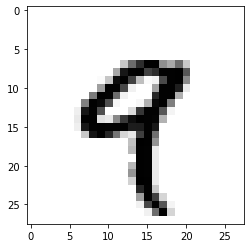

In [9]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show

### 2.2.6 넘파이로 텐서 조작하기

배열에 있는 특정 원소를 선택하는 것을 **slicing**이라고 함. 넘파이 배열에서 할 수 있는 슬라이싱 연산을 살펴보면:

11번째부터 101번째 숫자를 선택하여 (90, 28, 28) 크기의 배열을 만들기

In [10]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


동일하지만 더 자세한 표기법은 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정하는 것:

In [11]:
my_slic = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [12]:
my_slic = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


### 2.2.7 배치 데이터

딥러닝에서 사용하는 모든 데이터 텐서의 첫번째 축(0번째 축)은 샘플 축 **sample axis (sample dimension)**

딥러닝 모델은 한번에 전체 데이터셋을 처리하지 않음. 그 대신 데이터를 작은 **batch**로 나눔.

* MNIST 숫자 데이터에서 크기가 128인 배치는 아래와 같음
    * batch = train_images[:128]
    * batch = train_images[128:256]
    * batch = train_images[128 * n: 128 * (n+1)]
    
* 이런 배치 데이터를 다룰때는 첫번째축 (0번 축)을 **batch axis** 또는 **batch dimension** 이라고 부름

### 2.2.9 벡터 데이터

이런 데이터셋에서는 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로 배치 데이터는 2D 텐서로 인코딩 됨 (i.e. 벡터의 배열)

* 첫번째 축은 **sample axis**
* 두번째 축은 특성 축 **feature axis**

예시
* 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터
    * 각 사람은 3개의 값을 벡터로 구성
    * 10만명이 포함된 전체 데이터셋은 (10000, 3) 크기의 텐서에 저장됨

### 2.2.10 시계열 데이터 또는 시퀀스 데이터

데이터에서 시간또는 연속된 순서가 중요할 때는 시간 축을 포함하여 3D Tensor로 저장됨. 각 샘플은 벡터의 시퀀스로 인코딩 됨으로 배치 데이터는 3D텐서로 인코딩 됨.

![sequential.png](./images/2-2-10-sequential.png)

### 2.2.11 이미지 데이터

![image.png](./images/2-2-11-image.png)

이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어짐.

* MNIST처럼 흑백 이미지는 하나의 컬러 채널만을 가지고 있어 2D Tensor로 저장 가능
* 하지만 관례적으로 3D로 저장됨
* 흑백 이미지의 경우 컬러 채널의 차원 크기는 1
* 256 x 256 크기의 **흑백** 이미지에 대한 128개의 배치는 **(128, 256, 256, 1)** 크기의 텐서에 저장
* 256 x 256 크기의 **컬러** 이미지에 대한 128개의 배치는 **(128, 256, 256, 3)** 크기의 텐서에 

이미지 텐서의 크기를 지정하는 방식은 **(sample, height, width, color_depth)**

### 2.2.12 비디오 데이터

비디오 데이터는 현실에서 5D 텐서가 필요한 몇 안되는 데이터.

* 비디오는 프레임의 연속이고 각 프레임은 하나의 컬러 이미지
* 프레임은 (height, width, color_depth)
* 프레임의 연속은 (frames, height, width, color_depth)
* 여러 비디오의 배치는 (samples, frames, height, width, color_depth)